# Overview of the steps this code will take:
### 1. load in the data
### 2. Define Elipses function
### 3. Plot. 

In [2]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# Defining function to caluculate 95% confidence interval and create ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

After importing all the necessary packages, load in the data as a csv. This file contains all the x,y points for each of the species.

In [3]:
#load in the data
df = pd.read_csv('Procrustes_all.csv')

Explanation of Confidence elipses copied directly from https://stats.stackexchange.com/questions/217374/real-meaning-of-confidence-ellipse :

A confidence ellipse has to do with unobserved population parameters, like the true population mean of your 
bivariate distribution. A 95% confidence ellipse for this mean is really an algorithm with the following property: 
if you were to replicate your sampling from the underlying distribution many times and each time calculate a 
confidence ellipse, then 95% of the ellipses so constructed would contain the underlying mean. (Note that each 
sample would of course yield a different ellipse.)
    
    
Size of the confidence interval for the regression estimate, ci = 95%

Before we plot the PC values, we need to make confidence elipses for the species that we want to see. We will be using the df_el df for this function when we call it later. 

This code can was taken from https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py and can also be found on CarstenSchelp/plot_confidence_ellipse.py on github

In [8]:
def confidence_ellipse(x, y, ax, n_std=3.0, edgecolor='none', facecolor='none', **kwargs):

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        edgecolor=edgecolor,
        facecolor=facecolor,              
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Now it is time to plot the data! Note: this may take up to a few minutes, depending on the data size. 

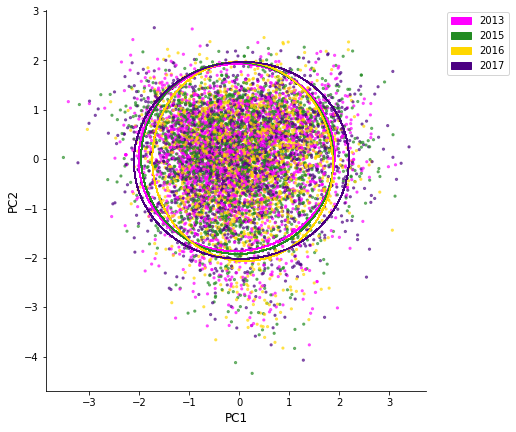

In [15]:
# Make a plot of PC1 vs PC2 with years colored

# Extract values from pc dataset 
xvalues = df['PC1']
yvalues = df['PC2']
color =  df['year']

# From a dataframe with extracted values
df_pc = pd.DataFrame(dict(xvalues=xvalues, yvalues=yvalues, color=color))

# Start creating subplot
fig, ax = plt.subplots(figsize=(7, 7))

# Create dictionary to set colors to species
# The dictionary for year wont have the years in '' because theyre being read in as numerical instead of categorical.
            # But that doesnt matter here. 
colors = {2013:'magenta',
          2015:'forestgreen',
          2016:'gold',
          2017:'indigo'}

# Create confidence intervals for each year using for loop and confidence_ellipse function
for i in df['year']:
    
    xvalues = df[df['year'] == i]['PC1']
    yvalues = df[df['year'] == i]['PC2']
    color = colors.get(i)
    
    confidence_ellipse(x = xvalues, y = yvalues, ax = ax, n_std = 1.960, edgecolor = color)

    
# Build the legend
patch1 = mpatches.Patch(color='magenta', label='2013')
patch2 = mpatches.Patch(color='forestgreen', label='2015')
patch3 = mpatches.Patch(color='gold', label='2016')
patch4 = mpatches.Patch(color='indigo', label='2017')

# Set up for handles declaration
patches = [patch1, patch2, patch3, patch4]

# Add legend to plot, borderaxespad and bbox are just aethetic adjustments to the placement of the legend.
legend = ax.legend(handles=patches, loc=2, borderaxespad=0.2, bbox_to_anchor=(1.05, 1))
                       
# Make scatter plot with extracted values and define point colors by year
ax.scatter(df_pc['xvalues'], df_pc['yvalues'], c=df_pc['color'].apply(lambda x: colors[x]), s=5, alpha = 0.6)

# Set axis labels
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)

# Remove top and right spines from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the plot square
ax.set_aspect(1./ax.get_data_ratio())

# Save figure
plt.savefig('Final_PCA_ALL_Year.tif', bbox_inches="tight", dpi=600)

# Show plot
plt.show()

The end. 